Após o processamento, restaram as seguintes classes no dataset:

0: 'Tomato Early blight leaf'

1: 'Tomato leaf'

2: 'Tomato leaf bacterial spot'

3: 'Tomato leaf late blight'

4: 'Tomato leaf mosaic virus'

5: 'Tomato leaf yellow virus'

6: 'Tomato mold leaf'

7: 'Tomato Septoria leaf spot'

8: 'Tomato two spotted spider mites leaf'

"0": "Folha de tomate com pinta-preta",

"1": "Folha de tomate saudável",

"2": "Folha de tomate com mancha bacteriana",

"3": "Folha de tomate com requeima",

"4": "Folha de tomate com vírus do mosaico",

"5": "Folha de tomate com Begomovirus (yellow leaf curl virus)",

"6": "Folha de tomate com mofo",

"7": "Folha de tomate com septoriose (fungo)",

"8": "Folha de tomate com ácaro-rajado (spider mite)"

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [10]:
# Caminhos das pastas de labels
label_paths = ['../../datasets/plantdoc-Tomato-YOLO/labels/train', '../../datasets/plantdoc-Tomato-YOLO/labels/val']

In [17]:
class_names = {
    0: 'Tomato Early blight leaf',
    1: 'Tomato leaf',
    2: 'Tomato leaf bacterial spot',
    3: 'Tomato leaf late blight',
    4: 'Tomato leaf mosaic virus',
    5: 'Tomato leaf yellow virus',
    6: 'Tomato mold leaf',
    7: 'Tomato Septoria leaf spot',
    8: 'Tomato two spotted spider mites leaf'
}

In [11]:
# Função para ler anotações e contar classes
def load_annotations(label_paths):
    class_counts = Counter()
    total_annotations = 0
    total_images = 0

    for path in label_paths:
        for label_file in os.listdir(path):
            total_images += 1
            with open(os.path.join(path, label_file), 'r') as f:
                lines = f.readlines()
                for line in lines:
                    total_annotations += 1
                    class_id = int(line.split()[0])
                    class_counts[class_id] += 1

    return class_counts, total_annotations, total_images

In [12]:
# Carregar anotações
class_counts, total_annotations, total_images = load_annotations(label_paths)

# Estatísticas gerais
average_annotations_per_image = total_annotations / total_images

In [13]:
print("Total de Imagens:", total_images)
print("Total de Anotações:", total_annotations)
print("Relação Anotações por Imagem:", average_annotations_per_image)

Total de Imagens: 721
Total de Anotações: 2840
Relação Anotações por Imagem: 3.938973647711512


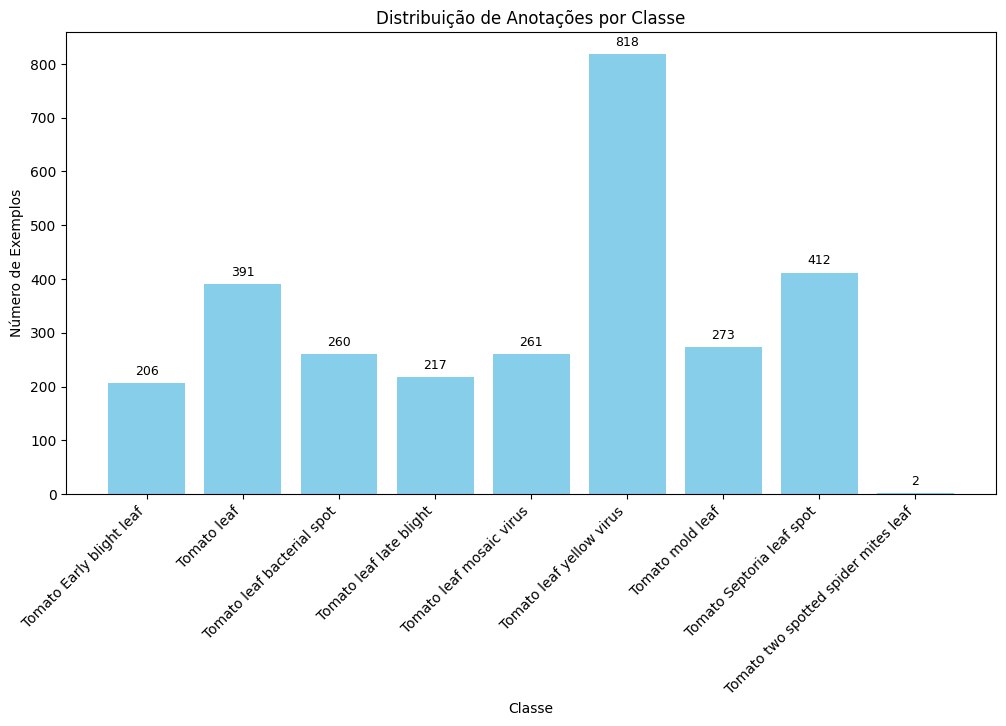

In [21]:
# Dados para o gráfico de distribuição de classes
classes = list(class_counts.keys())
counts = list(class_counts.values())
class_labels = [class_names[i] for i in classes]

# Gráfico de Barras - Distribuição de Anotações por Classe com rótulos inclinados e valores no topo das barras
plt.figure(figsize=(12, 6))
bars = plt.bar(classes, counts, color='skyblue')
plt.xlabel('Classe')
plt.ylabel('Número de Exemplos')
plt.title('Distribuição de Anotações por Classe')
plt.xticks(ticks=classes, labels=class_labels, rotation=45, ha='right', fontsize=10)

# Adicionar o número de anotações em cima de cada barra
for bar, count in zip(bars, counts):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Posição X do texto
        bar.get_height() + 10,              # Posição Y (acima da barra)
        f'{count}',                         # Texto a exibir
        ha='center',                        # Alinhamento horizontal
        va='bottom',                        # Alinhamento vertical
        fontsize=9                          # Tamanho da fonte
    )

plt.show()

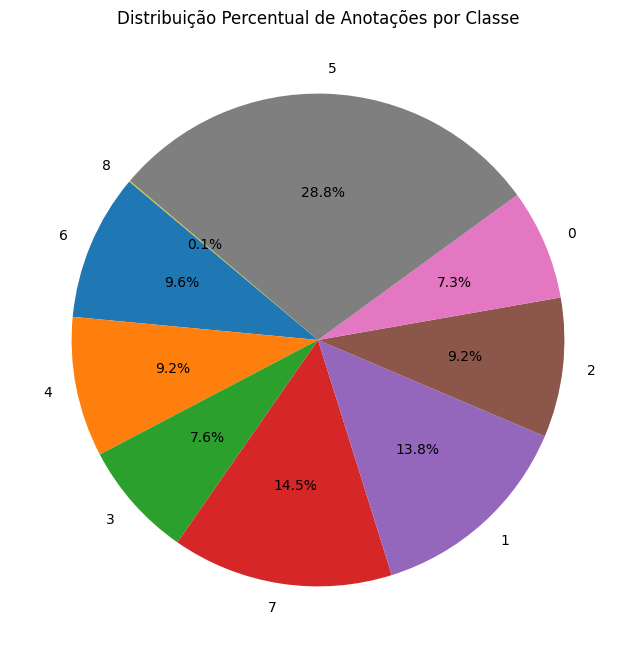

In [15]:
# Gráfico de Pizza - Distribuição de Classes (Opcional)
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=classes, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição Percentual de Anotações por Classe')
plt.show()

In [24]:
# PlantVillage path:
path = "/media/heitor/DiscoExtra/TCC_datasets/Plant_leave_diseases_dataset_without_augmentation"

In [28]:
cls_dict = {}
for cls in os.listdir(path):
    if "Tomato" in cls:
        dir = os.path.join(path, cls)
        cls_dict[cls] = len([file for file in os.listdir(dir) if os.path.isfile(os.path.join(dir, file))])
    
cls_dict

{'Tomato___Tomato_mosaic_virus': 373,
 'Tomato___Leaf_Mold': 952,
 'Tomato___healthy': 1591,
 'Tomato___Late_blight': 1909,
 'Tomato___Spider_mites Two-spotted_spider_mite': 1676,
 'Tomato___Early_blight': 1000,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 5357,
 'Tomato___Bacterial_spot': 2127,
 'Tomato___Septoria_leaf_spot': 1771,
 'Tomato___Target_Spot': 1404}

In [ ]:
Tomato Early blight leaf OK
Tomato leaf OK
Tomato leaf bacterial spot OK
Tomato leaf late blight OK
Tomato leaf mosaic virus OK
Tomato leaf yellow virus OK
Tomato mold leaf OK
Tomato Septoria leaf spot OK
Tomato two spotted spider mites leaf OK

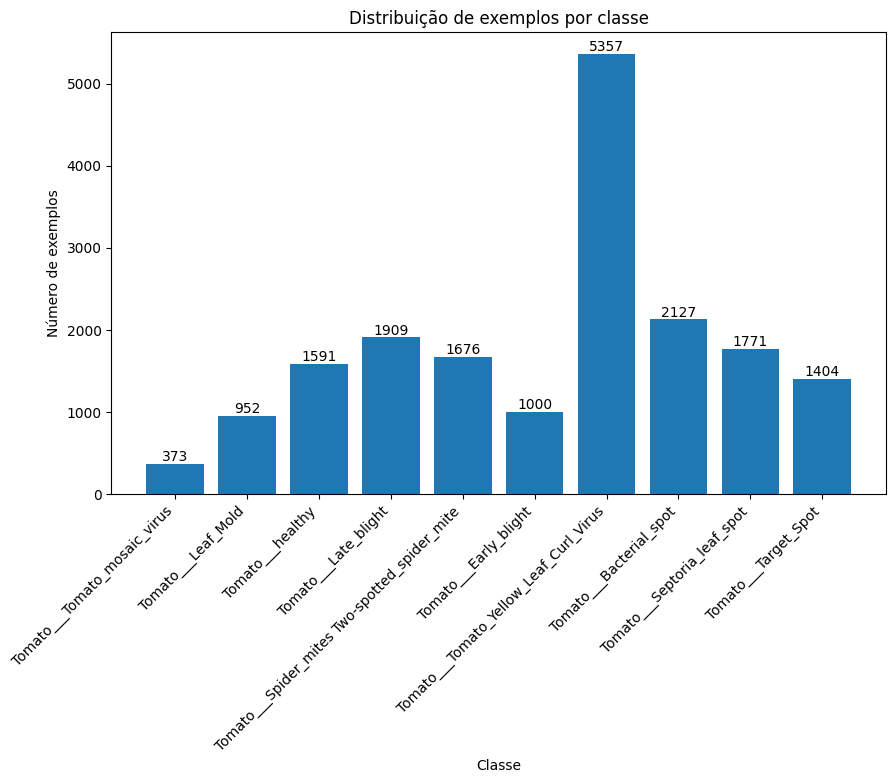

In [31]:
# Extracting labels and values
labels = list(cls_dict.keys())
values = list(cls_dict.values())

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(cls_dict)), values, tick_label=labels)

# Adding labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

# Rotating labels for better readability
plt.xticks(rotation=45, ha='right')
plt.xlabel('Classe')
plt.ylabel('Número de exemplos')
plt.title('Distribuição de exemplos por classe')

# Showing the plot
plt.show()